# User prediction

Let's see how a user can run `maxsmi` for compound prediction.

In [1]:
from pathlib import Path
import os
import pandas as pd
from IPython.display import Image

In [2]:
# Path to this notebook
HERE = Path(_dh[-1])

In [3]:
%%bash
cd ../..
python maxsmi/prediction_unlabeled_data.py --help

usage: prediction_unlabeled_data.py [-h] [--task TASK]
                                    [--smiles_prediction USER_SMILES]

optional arguments:
  -h, --help            show this help message and exit
  --task TASK           data to be used
  --smiles_prediction USER_SMILES
                        SMILES for prediction


In [4]:
%%bash
cd ../..
python maxsmi/prediction_unlabeled_data.py --task lipophilicity --smiles_prediction CC1CC1CCN

Script completed. Output can be found at maxsmi/user_prediction/lipophilicity_CC1CC1CCN/


In [5]:
path = f"{HERE}/../../maxsmi/user_prediction/lipophilicity_CC1CC1CCN/"

Let's see what was stored during the execution.

In [6]:
os.listdir(path)

['user_prediction_table.csv', '2D_molecule.png', 'user_prediction_output.log']

There are three files:

* `user_prediction_table.csv` : The results of the prediction
* `2D_molecule.png` : The molecular graph
* `user_prediction_output.log`: Additional information on the prediction

Let have a closer look.

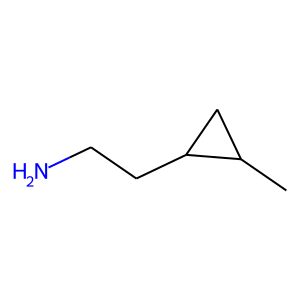

In [7]:
Image(filename=f"{path}/{os.listdir(path)[1]}")

In [8]:
results = pd.read_csv(f"{path}/{os.listdir(path)[0]}")
results

,user_smiles,smiles_in_training,canonical_smiles,augmented_smiles,average_prediction,std_prediction
0,CC1CC1CCN,False,CC1CC1CCN,"['CC1CC1CCN', 'CC1CC1CCN', 'CC1CC1CCN', 'CC1CC...",-0.731691,0.440803


In [9]:
print(f"The SMILES given by the user {results.user_smiles[0]} "
      f"was in the training set: {results.smiles_in_training[0]}.\n"
      f"Its lipophilicity value is predicted at "
      f"{results.average_prediction[0]:.2f} "
      f"with a confidence of {results.std_prediction[0]:.2f}.")

The SMILES given by the user CC1CC1CCN was in the training set: False.
Its lipophilicity value is predicted at -0.73 with a confidence of 0.44.
